# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from DecisionTree import DecisionTree
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/bankloan.csv')
df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP.Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0


In [4]:
df.drop('ID',axis=1,inplace=True)

<Axes: >

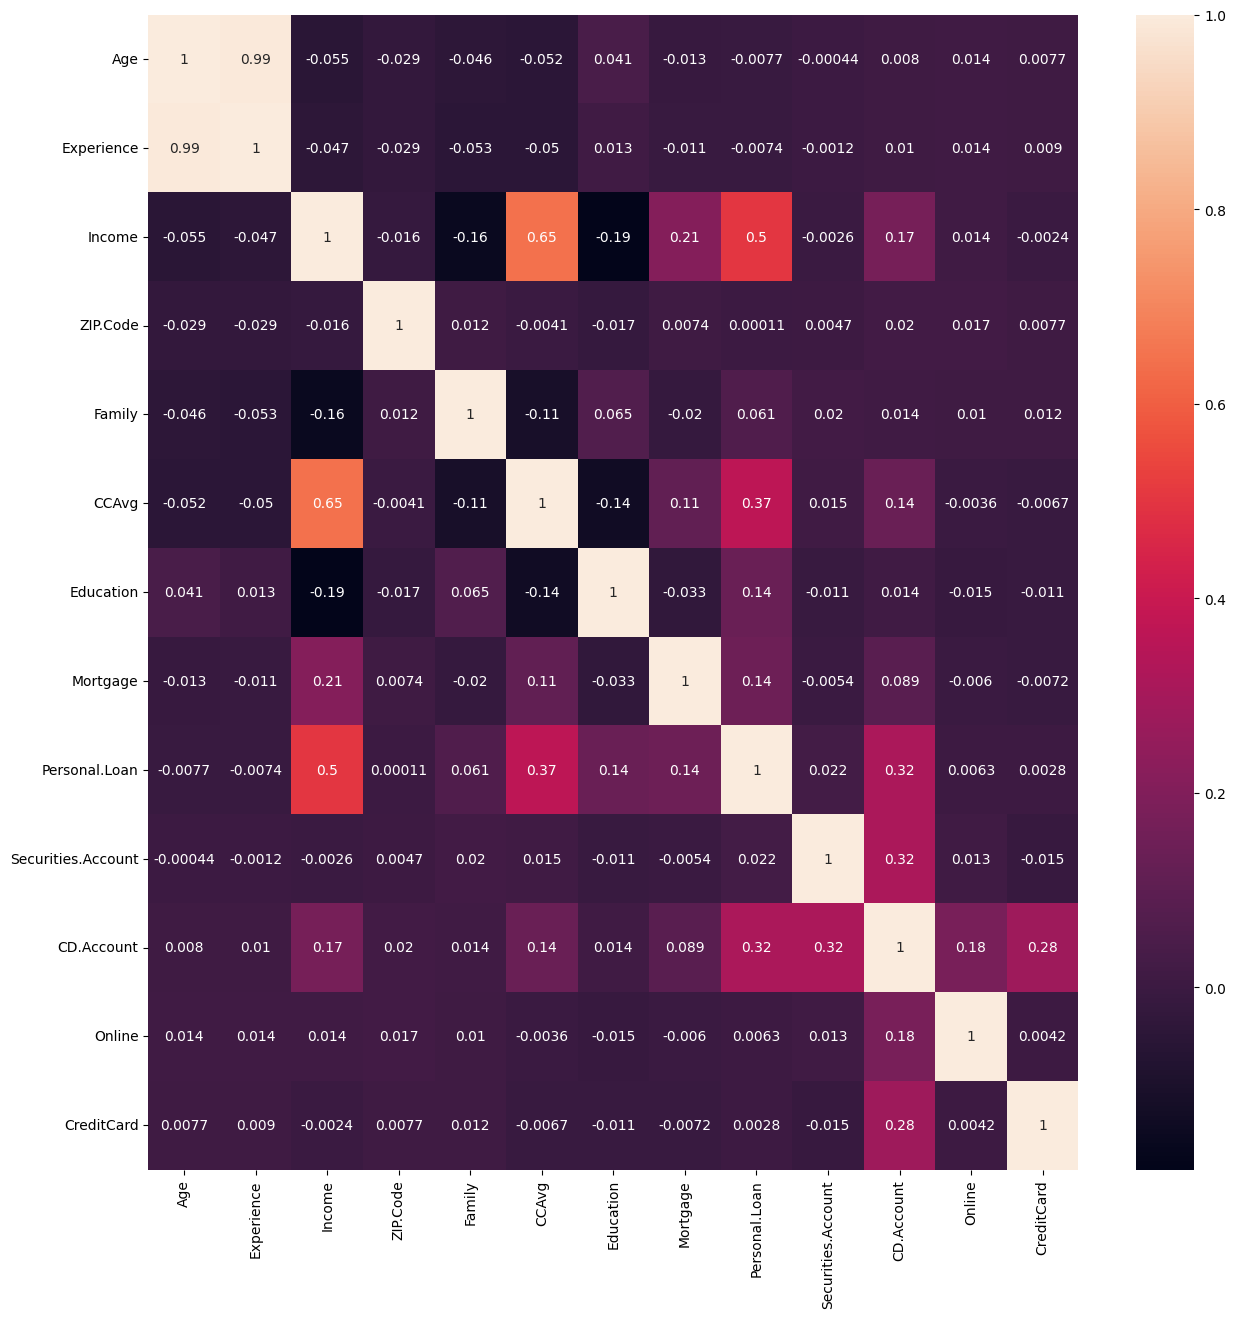

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

**Since, ZIP.Code does not have much of correlation with other variables, we drop it.**

In [6]:
df.drop('ZIP.Code',axis=1,inplace=True)

# Model Training

In [7]:
class RandomForest:
  def __init__(self, n_trees=10, max_depth=10, min_splits=2, n_features=None):
    self.n_trees=n_trees
    self.max_depth=max_depth
    self.min_splits=min_splits
    self.n_features=n_features
    self.trees=[]

  def fit(self,x,y):
    self.trees=[]
    for _ in range(self.n_trees):
      tree=DecisionTree(self.min_splits,self.max_depth,self.n_features)
      x_sample,y_sample=self._bootstrap_sample(x,y)
      tree.fit(x_sample,y_sample)
      self.trees.append(tree)

  def _bootstrap_sample(self,x,y):
    n_sample=x.shape[0]
    idxs=np.random.choice(n_sample,n_sample,replace=True)
    return x[idxs],y[idxs]

  def _common_labels(self,y):
    counter=Counter(y)
    return counter.most_common(1)[0][0]

  def predict(self,x):
    predictions=np.array([tree.predict(x) for tree in self.trees])
    tree_preds=np.swapaxes(predictions,0,1)
    preds=np.array([self._common_labels(pred) for pred in tree_preds])
    return preds

In [21]:
x = df.drop('CreditCard', axis=1)
y = df['CreditCard']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online
1501,30,4,35,2,0.3,2,0,0,1,0,0
2586,47,23,149,4,6.1,1,0,1,0,0,0
2653,30,5,121,2,3.1,1,408,0,0,0,1
1055,31,6,62,1,1.0,1,0,0,1,0,1
705,62,36,30,3,0.7,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4711,65,40,59,3,2.4,1,0,0,0,0,0
2313,58,32,54,3,0.3,2,0,0,0,0,1
3214,61,37,33,3,0.1,3,0,0,0,0,1
2732,33,9,38,1,2.1,3,133,0,0,0,0


In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [27]:
rf=RandomForest(n_features=100,max_depth=10)
rf.fit(x_train,y_train)

# Model Testing

In [29]:
y_pred=rf.predict(x_test)

In [30]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score)
print(cm)
print(classification_report(y_test,y_pred))

0.745
[[696  12]
 [243  49]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.85       708
           1       0.80      0.17      0.28       292

    accuracy                           0.74      1000
   macro avg       0.77      0.58      0.56      1000
weighted avg       0.76      0.74      0.68      1000

